In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

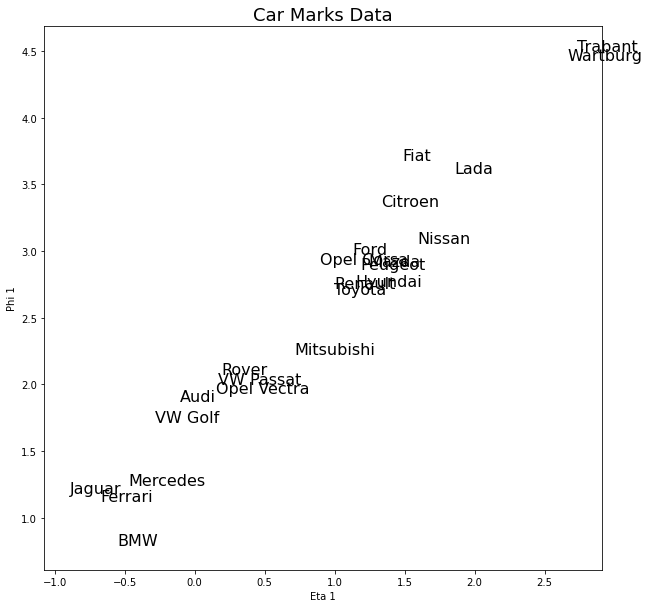

In [2]:
cardat = pd.read_csv("carmean2.dat", sep = "\s+", header=None)
car = cardat.iloc[:, 1:]

car.columns = ["economy", "service", "value", "price", "design", "sporty", 
               "safety", "handling"]

marks = ["Audi", "BMW", "Citroen", "Ferrari", "Fiat", "Ford", "Hyundai", 
         "Jaguar", "Lada", "Mazda", "Mercedes", "Mitsubishi", "Nissan", 
         "Opel Corsa", "Opel Vectra", "Peugeot", "Renault", "Rover", "Toyota", 
         "Trabant", "VW Golf", "VW Passat", "Wartburg"]

cars = car.iloc[:, [3, 2, 0, 1, 4, 5, 6, 7]]
s = np.cov(cars.T)
sa = s[:2, :2]
sb = s[2:8, 2:8]

eiga = np.linalg.eig(sa)
eigb = np.linalg.eig(sb)
sa2 = eiga[1] @ np.diag(1/np.sqrt(eiga[0])) @ eiga[1].T
sb2 = eigb[1] @ np.diag(1/np.sqrt(eigb[0])) @ eigb[1].T

k = sa2 @ s[:2, 2:8] @ sb2
g, l, d = np.linalg.svd(k, full_matrices = False)
a = sa2 @ g
b = sb2 @ d.T
eta = np.array(cars.iloc[:, :2]) @ a[:, 0]
phi = np.array(cars.iloc[:, 2:8]) @ b[:, 0]


fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(eta, phi, c = "w")
for i in range(len(marks)):
    ax.text(eta[i], phi[i], marks[i], fontsize = 16)

plt.xlabel("Eta 1")
plt.ylabel("Phi 1")
plt.title("Car Marks Data", fontsize = 18)
plt.show()